# Graphing the number of favorites to @infinite_scream over time
By R. Stuart Geiger (@staeiou), Released CC-BY 4.0 & MIT License

## Setup
### Installing dependencies

In [1]:
!pip install tweepy pandas seaborn 

### Importing libraries

In [2]:
import random
import twitter_login  # a file containing my API keys
import tweepy

import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pytz

### Authenticate with Twitter

In [3]:
CONSUMER_KEY = twitter_login.CONSUMER_KEY
CONSUMER_SECRET = twitter_login.CONSUMER_SECRET
ACCESS_TOKEN = twitter_login.ACCESS_TOKEN
ACCESS_TOKEN_SECRET = twitter_login.ACCESS_TOKEN_SECRET

# Authenticate

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

## Getting the tweets
This is limited to the last ~3200 tweets from the API. :(

In [4]:
# by yanofsky, https://gist.github.com/yanofsky/5436496

screen_name="infinite_scream"

#initialize a list to hold all the tweepy Tweets
alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name,count=200)

#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    print("getting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    print("...%s tweets downloaded so far" % (len(alltweets)))

getting tweets before 890520937354993663
...400 tweets downloaded so far
getting tweets before 890165966184882175
...600 tweets downloaded so far
getting tweets before 889821186279997441
...800 tweets downloaded so far
getting tweets before 889589662125363199
...1000 tweets downloaded so far
getting tweets before 889144233315250176
...1200 tweets downloaded so far
getting tweets before 888713905316515839
...1400 tweets downloaded so far
getting tweets before 888281045912526847
...1600 tweets downloaded so far
getting tweets before 887906074371731455
...1800 tweets downloaded so far
getting tweets before 887478259469910015
...2000 tweets downloaded so far
getting tweets before 887100750219890688
...2200 tweets downloaded so far
getting tweets before 886717121975201791
...2400 tweets downloaded so far
getting tweets before 886506830297485311
...2600 tweets downloaded so far
getting tweets before 886081529079836672
...2800 tweets downloaded so far
getting tweets before 885670229136879615


## Data processing
First, go through all the tweets and pull out a few key variables, putting it into a two-dimensional array.

In [5]:
tweets = [[tweet.id_str, tweet.created_at, tweet.favorite_count, tweet.retweet_count,\
           tweet.favorite_count + tweet.retweet_count, tweet.in_reply_to_screen_name is not None,\
           tweet.text, len(tweet.text)] for tweet in alltweets]

Convert to a pandas DataFrame for easy processing

In [6]:
tweets_df = pd.DataFrame.from_dict(tweets)

In [7]:
tweets_df.columns = ["id_str", "created_at", "favorite_count", "retweet_count", "fav_rt_count", \
                     "is_reply", "tweet_text", "tweet_length"]

Peek into this dataframe, pulling out rows 1000 to 1005

In [8]:
tweets_df[1000:1005]

,id_str,created_at,favorite_count,retweet_count,fav_rt_count,is_reply,tweet_text,tweet_length
1000,889141714946056192,2017-07-23 15:14:38,7,2,9,False,AAAAAAHHHHHHHHHHHHH,19
1001,889139200238465025,2017-07-23 15:04:39,8,0,8,False,AAAAAAAAHHHHHHH,15
1002,889136683387674629,2017-07-23 14:54:39,12,5,17,False,AAAAAAAAAAAAAAHHHHH,19
1003,889134165496655872,2017-07-23 14:44:39,9,3,12,False,AAAHHH,6
1004,889131652219367424,2017-07-23 14:34:39,11,5,16,False,AAAAAHHHHHHHHHHHHHH,19


Filter out tweets that were replies to specific users.

In [9]:
tweets_noreplies_df = tweets_df[tweets_df['is_reply'] == False]


Time is in UTC / GMT-0 from the API, convert to US/Pacific

In [10]:
fav_count = tweets_noreplies_df.set_index("created_at")["fav_rt_count"]
fav_count = fav_count.tz_localize(pytz.utc).tz_convert(pytz.timezone('US/Pacific'))
fav_count[0:10]

created_at
2017-07-27 21:34:39-07:00     27
2017-07-27 21:24:39-07:00    131
2017-07-27 21:14:39-07:00     61
2017-07-27 21:04:39-07:00     77
2017-07-27 20:54:39-07:00     14
2017-07-27 20:44:39-07:00    181
2017-07-27 20:34:39-07:00     51
2017-07-27 20:24:39-07:00    100
2017-07-27 20:14:39-07:00     62
2017-07-27 20:04:39-07:00     28
Name: fav_rt_count, dtype: int64

## Visualization

(736521.53093749995, 736538.44072916661)

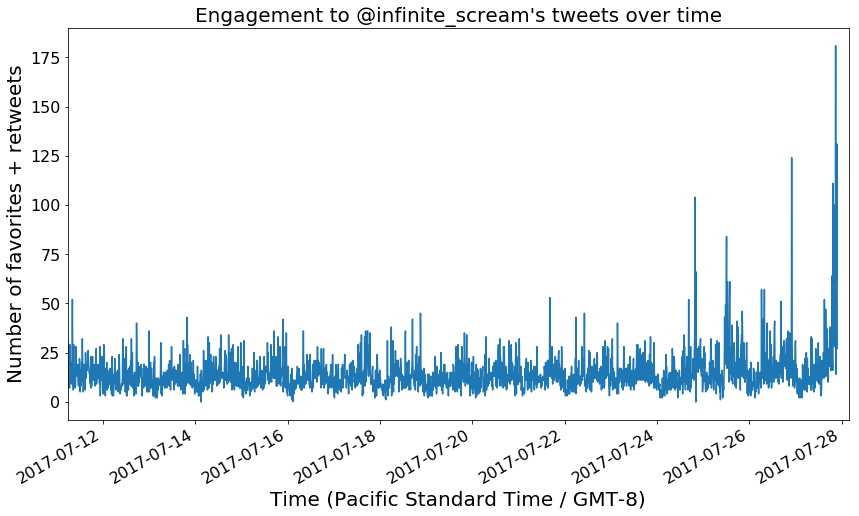

In [11]:
ax = fav_count.plot(figsize=[14,8], fontsize=16)
ax.set_title("Engagement to @infinite_scream's tweets over time", {"fontsize":20})
ax.set_ylabel("Number of favorites + retweets", {"fontsize":20})
ax.set_xlabel("Time (Pacific Standard Time / GMT-8)", {"fontsize":20})
xlim_start, xlim_end = plt.xlim()
xlim_end = xlim_end + .25
plt.xlim(xlim_start, xlim_end)

## Output to file

In [12]:
tweets_df.index.name = "tweet_num"
tweets_df.to_csv("infinite_scream.csv")
tweets_df.to_json("infinite_scream.json")

In [13]:
!head infinite_scream.csv

tweet_num,id_str,created_at,favorite_count,retweet_count,fav_rt_count,is_reply,tweet_text,tweet_length
0,890792730653339648,2017-07-28 04:35:11,0,0,0,True,@citizen_born AAAAAAAAAAAAAAAAHHHHHH,36
1,890792730653274112,2017-07-28 04:35:11,0,0,0,True,@LeslieBattenND AAAAAAAAAAAAAAAAHH,34
2,890792730644840449,2017-07-28 04:35:11,0,0,0,True,@AngryNIdaho AAAAAAAAAAAAAAAAAHHHHHHH,37
3,890792593658871808,2017-07-28 04:34:39,11,16,27,False,AAAAAAHHHHHHH,13
4,890791471674253312,2017-07-28 04:30:11,2,1,3,True,@bazelonbethany AAAAAAAAAAAAAAAHHHHHHHH,39
5,890790211311071233,2017-07-28 04:25:11,0,0,0,True,@parsaguin AAAAAAHHHHHHHHHHHHHHH,32
6,890790079735762945,2017-07-28 04:24:39,64,67,131,False,AAAAAAAAAAAAAAAAAAAAAAAHHHHHHHHHHHH,35
7,890788957214167040,2017-07-28 04:20:12,0,0,0,True,@YerbaDog AHHHHH,16
8,890788957126103040,2017-07-28 04:20:12,0,0,0,True,@TheDannyBarry AAAAAAAAAAAAAHHHHHHHHH,37
